# Plot results

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import itertools as itt
import json
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import scipy.stats as sps
from matplotlib import rc

In [2]:
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['pdf.fonttype'] = 42

---
## Create plots for local distances

In [3]:
local_distances_2 = pd.read_csv('../results/disease_gene_vs_disease_variant/local_distances.csv')
local_distances_2['scenario'] = ['Gene- vs. variant-based diseasome' for _ in range(local_distances_2.shape[0])]
local_distances_3 = pd.read_csv('../results/disease_gene_vs_disease_symptom/local_distances.csv')
local_distances_3['scenario'] = ['Gene- vs. symptom-based diseasome' for _ in range(local_distances_3.shape[0])]
local_distances_4 = pd.read_csv('../results/disease_gene_vs_disease_drug/local_distances.csv')
local_distances_4['scenario'] = ['Gene- vs. drug-based diseasome' for _ in range(local_distances_4.shape[0])]
local_distances_5 = pd.read_csv('../results/disease_drug_vs_disease_variant/local_distances.csv')
local_distances_5['scenario'] = ['Variant- vs. drug-based diseasome' for _ in range(local_distances_5.shape[0])]
local_distances_6 = pd.read_csv('../results/disease_symptom_vs_disease_variant/local_distances.csv')
local_distances_6['scenario'] = ['Variant- vs. symptom-based diseasome' for _ in range(local_distances_6.shape[0])]
local_distances_7 = pd.read_csv('../results/disease_drug_vs_disease_symptom/local_distances.csv')
local_distances_7['scenario'] = ['Symptom- vs. drug-based diseasome' for _ in range(local_distances_7.shape[0])]
local_distances_9 = pd.read_csv('../results/GED_drug_indication_distances_vs_DrPPD/local_distances.csv')
local_distances_9Dr = local_distances_9[local_distances_9['node'].str.contains('drugbank')] 
local_distances_9Dr['scenario'] = ['Indication vs. protein-based drug-dis. network (drugs)' for _ in range(local_distances_9Dr.shape[0])]
local_distances_9Dis = local_distances_9[~local_distances_9['node'].str.contains('drugbank')]
local_distances_9Dis['scenario'] = ['Indication vs. protein-based drug-dis. network (diseases)' for _ in range(local_distances_9Dis.shape[0])]

local_distances_22 = pd.read_csv('../results/disease_gene_vs_disease_variant_ICD10/local_distances.csv')
local_distances_22['scenario'] = ['Gene- vs. variant-based diseasome' for _ in range(local_distances_22.shape[0])]
local_distances_33 = pd.read_csv('../results/disease_gene_vs_disease_symptom_ICD10/local_distances.csv')
local_distances_33['scenario'] = ['Gene- vs. symptom-based diseasome' for _ in range(local_distances_33.shape[0])]
local_distances_44 = pd.read_csv('../results/disease_gene_vs_disease_drug_ICD10/local_distances.csv')
local_distances_44['scenario'] = ['Gene- vs. drug-based diseasome' for _ in range(local_distances_44.shape[0])]
local_distances_55 = pd.read_csv('../results/disease_drug_vs_disease_variant_ICD10/local_distances.csv')
local_distances_55['scenario'] = ['Variant- vs. drug-based diseasome' for _ in range(local_distances_55.shape[0])]
local_distances_66 = pd.read_csv('../results/disease_symptom_vs_disease_variant_ICD10/local_distances.csv')
local_distances_66['scenario'] = ['Variant- vs. symptom-based diseasome' for _ in range(local_distances_66.shape[0])]
local_distances_77 = pd.read_csv('../results/disease_drug_vs_disease_symptom_ICD10/local_distances.csv')
local_distances_77['scenario'] = ['Symptom- vs. drug-based diseasome' for _ in range(local_distances_77.shape[0])]
local_distances_99 = pd.read_csv('../results/GED_drug_indication_distances_vs_DrPD_ICD10/local_distances.csv')
local_distances_99Dr = local_distances_99[local_distances_99['node'].str.contains('drugbank')]    
local_distances_99Dr['scenario'] = ['Indication vs. protein-based drug-dis. network (drugs)' for _ in range(local_distances_99Dr.shape[0])]
local_distances_99Dis = local_distances_99[~local_distances_99['node'].str.contains('drugbank')]
local_distances_99Dis['scenario'] = ['Indication vs. protein-based drug-dis. network (diseases)' for _ in range(local_distances_99Dis.shape[0])]

local_distances_1 = pd.read_csv('../results/disease_gene_vs_disease_comorbidity_ICD10/local_distances.csv')
local_distances_1['scenario'] = ['Gene- vs. comorbidity-based diseasome' for _ in range(local_distances_1.shape[0])]
local_distances_10 = pd.read_csv('../results/disease_variant_vs_disease_comorbidity_ICD10/local_distances.csv')
local_distances_10['scenario'] = ['Variant- vs. comorbidity-based diseasome' for _ in range(local_distances_10.shape[0])]
local_distances_11 = pd.read_csv('../results/disease_symptom_vs_disease_comorbidity_ICD10/local_distances.csv')
local_distances_11['scenario'] = ['Symptom- vs. comorbidity-based diseasome' for _ in range(local_distances_11.shape[0])]
local_distances_12 = pd.read_csv('../results/disease_drug_vs_disease_comorbidity_ICD10/local_distances.csv')
local_distances_12['scenario'] = ['Drug- vs. comorbidity-based diseasome' for _ in range(local_distances_12.shape[0])]
local_distances_8 = pd.read_csv('../results/drug_disease_vs_drug_target/local_distances.csv')
local_distances_8['scenario'] = ['Target- vs. indication-based drugome' for _ in range(local_distances_8.shape[0])]

for ld in [local_distances_2, local_distances_22, local_distances_3, local_distances_33, local_distances_4, local_distances_44, 
           local_distances_5, local_distances_55, local_distances_6, local_distances_66, local_distances_7, local_distances_77, local_distances_8,
          local_distances_1, local_distances_10, local_distances_11, local_distances_12]:
    indices_remove = ld[ld['distance_type'] == "normalized_scores"].index
    ld.drop(indices_remove, inplace=True)
    indices_remove = ld[ld['distance_type'] == "normalized_ranks"].index
    ld.drop(indices_remove, inplace=True)

# concatenate both namespaces in one dataframe
ld_concatenated2 = pd.concat([local_distances_2.assign(space='MONDO'), local_distances_22.assign(space='ICD-10')], ignore_index=True)
ld_concatenated3 = pd.concat([local_distances_3.assign(space='MONDO'), local_distances_33.assign(space='ICD-10')], ignore_index=True)
ld_concatenated4 = pd.concat([local_distances_4.assign(space='MONDO'), local_distances_44.assign(space='ICD-10')], ignore_index=True)
ld_concatenated5 = pd.concat([local_distances_5.assign(space='MONDO'), local_distances_55.assign(space='ICD-10')], ignore_index=True)
ld_concatenated6 = pd.concat([local_distances_6.assign(space='MONDO'), local_distances_66.assign(space='ICD-10')], ignore_index=True)
ld_concatenated7 = pd.concat([local_distances_7.assign(space='MONDO'), local_distances_77.assign(space='ICD-10')], ignore_index=True)
ld_concatenated9Dr = pd.concat([local_distances_9Dr.assign(space='MONDO'), local_distances_99Dr.assign(space='ICD-10')], ignore_index=True)
ld_concatenated9Dis = pd.concat([local_distances_9Dis.assign(space='MONDO'), local_distances_99Dis.assign(space='ICD-10')], ignore_index=True)
ld_concatenated1 = local_distances_1.assign(space='ICD-10')
ld_concatenated10 = local_distances_10.assign(space='ICD-10')
ld_concatenated11 = local_distances_11.assign(space='ICD-10')
ld_concatenated12 = local_distances_12.assign(space='ICD-10')
ld_concatenated8 = local_distances_8.assign(space='MONDO')
local_distances = pd.concat([ld_concatenated2, ld_concatenated3, ld_concatenated4, ld_concatenated5, ld_concatenated6, ld_concatenated7, 
                             ld_concatenated9Dr, ld_concatenated9Dis, ld_concatenated1, ld_concatenated10, ld_concatenated11, ld_concatenated12, ld_concatenated8], ignore_index=True)    

/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_21520/2540388996.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  local_distances_9Dr['scenario'] = ['Indication vs. protein-based drug-dis. network (drugs)' for _ in range(local_distances_9Dr.shape[0])]
/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_21520/2540388996.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  local_distances_9Dis['scenario'] = ['Indication vs. protein-based drug-dis. network (diseases)' for _ in range(local

In [4]:
local_distances.rename(columns={'distance': 'Local distance', 'permuted': 'Permuted'}, inplace=True)

In [5]:
maxima = []
lds = [[local_distances_2, local_distances_22], [local_distances_3, local_distances_33], [local_distances_4, local_distances_44], [local_distances_5, local_distances_55], [local_distances_6, local_distances_66], [local_distances_7, local_distances_77], [local_distances_9Dr, local_distances_99Dr], [local_distances_9Dis, local_distances_99Dis]]
for ld in lds:
    ld_mondo = ld[0]
    ld_icd = ld[1]
    dftopo_m = ld_mondo[ld_mondo['distance_type'].str.contains("topology_only")]
    dftopo_icd = ld_icd[ld_icd['distance_type'].str.contains("topology_only")]
    maxima.append([dftopo_m['distance'].max(), dftopo_icd['distance'].max()])
lds = [local_distances_1, local_distances_10, local_distances_11, local_distances_12]
for ld in lds:
    dftopo_icd = ld[ld['distance_type'].str.contains("topology_only")]
    maxima.append([0.0,dftopo_icd['distance'].max()])
dftopo_m = local_distances_8[local_distances_8['distance_type'].str.contains("topology_only")]
maxima.append([dftopo_m['distance'].max()])

print(maxima)

[[1649.0, 469.0], [4754.0, 541.0], [397.0, 382.0], [743.0, 488.0], [4395.0, 600.0], [297.0, 452.0], [251.0, 207.0], [1007.0, 885.0], [0.0, 451.0], [0.0, 600.0], [0.0, 593.0], [0.0, 435.0], [1010.0]]


In [6]:
def p_value_to_level(p_value):
    if p_value > 0.05:
        return 'ns'
    elif p_value > 0.01:
        return '*'
    elif p_value > 0.001:
        return '**'
    elif p_value > 0.0001:
        return '***'
    else:
        return '****'
    
def add_p_values(fig, p_value_strings, maxima):
    for axis_index, axis in enumerate(fig.axes.flatten()):
        bottom, top = axis.get_ylim()
        axis.set_ylim(top=top + (top - bottom) * .1)
        for x_pos, text in enumerate(p_value_strings[axis_index]):
            axis.text(x_pos, maxima[axis_index][x_pos] + (top - bottom) * .05, text, ha='center', va='bottom')

In [7]:
# P-values are from global_mwu_p_values.csv files in the respective results directories.
p_values_2 = pd.read_csv('../results/disease_gene_vs_disease_variant/global_mwu_p_values.csv')
p_values_3 = pd.read_csv('../results/disease_gene_vs_disease_symptom/global_mwu_p_values.csv')
p_values_4 = pd.read_csv('../results/disease_gene_vs_disease_drug/global_mwu_p_values.csv')
p_values_5 = pd.read_csv('../results/disease_drug_vs_disease_variant/global_mwu_p_values.csv')
p_values_6 = pd.read_csv('../results/disease_symptom_vs_disease_variant/global_mwu_p_values.csv')
p_values_7 = pd.read_csv('../results/disease_drug_vs_disease_symptom/global_mwu_p_values.csv')
p_values_9Dr = pd.read_csv('../results/GED_drug_indication_distances_vs_DrPPD/global_mwu_p_values_drugs.csv')
p_values_9Dis = pd.read_csv('../results/GED_drug_indication_distances_vs_DrPPD/global_mwu_p_values_diseases.csv')

p_values_22 = pd.read_csv('../results/disease_gene_vs_disease_variant_ICD10/global_mwu_p_values.csv')
p_values_33 = pd.read_csv('../results/disease_gene_vs_disease_symptom_ICD10/global_mwu_p_values.csv')
p_values_44 = pd.read_csv('../results/disease_gene_vs_disease_drug_ICD10/global_mwu_p_values.csv')
p_values_55 = pd.read_csv('../results/disease_drug_vs_disease_variant_ICD10/global_mwu_p_values.csv')
p_values_66 = pd.read_csv('../results/disease_symptom_vs_disease_variant_ICD10/global_mwu_p_values.csv')
p_values_77 = pd.read_csv('../results/disease_drug_vs_disease_symptom_ICD10/global_mwu_p_values.csv')
p_values_99Dr = pd.read_csv('../results/GED_drug_indication_distances_vs_DrPD_ICD10/global_mwu_p_values_drugs.csv')
p_values_99Dis = pd.read_csv('../results/GED_drug_indication_distances_vs_DrPD_ICD10/global_mwu_p_values_diseases.csv')

p_values_1 = pd.read_csv('../results/disease_gene_vs_disease_comorbidity_ICD10/global_mwu_p_values.csv')
p_values_10 = pd.read_csv('../results/disease_variant_vs_disease_comorbidity_ICD10/global_mwu_p_values.csv')
p_values_11 = pd.read_csv('../results/disease_symptom_vs_disease_comorbidity_ICD10/global_mwu_p_values.csv')
p_values_12 = pd.read_csv('../results/disease_drug_vs_disease_comorbidity_ICD10/global_mwu_p_values.csv')
p_values_8 = pd.read_csv('../results/drug_disease_vs_drug_target/global_mwu_p_values.csv')

for pvd in [p_values_2, p_values_22, p_values_3, p_values_33, p_values_4, p_values_44, p_values_5, p_values_55, p_values_6, p_values_66, p_values_7, 
            p_values_77, p_values_8, p_values_1, p_values_10, p_values_11, p_values_12]:
    indices_remove = pvd[pvd['distance_type'] == "normalized_scores"].index
    pvd.drop(indices_remove, inplace=True)
    indices_remove = pvd[pvd['distance_type'] == "normalized_ranks"].index
    pvd.drop(indices_remove, inplace=True)
    
pval_concatenated2 = pd.concat([p_values_2.assign(space='MONDO'), p_values_22.assign(space='ICD-10')], ignore_index=True)
pval_concatenated2.set_index('space', inplace=True)
pval_concatenated3 = pd.concat([p_values_3.assign(space='MONDO'), p_values_33.assign(space='ICD-10')], ignore_index=True)
pval_concatenated3.set_index('space', inplace=True)
pval_concatenated4 = pd.concat([p_values_4.assign(space='MONDO'), p_values_44.assign(space='ICD-10')], ignore_index=True)
pval_concatenated4.set_index('space', inplace=True)
pval_concatenated5 = pd.concat([p_values_5.assign(space='MONDO'), p_values_55.assign(space='ICD-10')], ignore_index=True)
pval_concatenated5.set_index('space', inplace=True)
pval_concatenated6 = pd.concat([p_values_6.assign(space='MONDO'), p_values_66.assign(space='ICD-10')], ignore_index=True)
pval_concatenated6.set_index('space', inplace=True)
pval_concatenated7 = pd.concat([p_values_7.assign(space='MONDO'), p_values_77.assign(space='ICD-10')], ignore_index=True)
pval_concatenated7.set_index('space', inplace=True)
pval_concatenated9Dr = pd.concat([p_values_9Dr.assign(space='MONDO'), p_values_99Dr.assign(space='ICD-10')], ignore_index=True)
pval_concatenated9Dr.set_index('space', inplace=True)
pval_concatenated9Dis = pd.concat([p_values_9Dis.assign(space='MONDO'), p_values_99Dis.assign(space='ICD-10')], ignore_index=True)
pval_concatenated9Dis.set_index('space', inplace=True)
pval_concatenated1 = p_values_1.assign(space='ICD-10')
pval_concatenated1.set_index('space', inplace=True)
pval_concatenated10 = p_values_10.assign(space='ICD-10')
pval_concatenated10.set_index('space', inplace=True)
pval_concatenated11 = p_values_11.assign(space='ICD-10')
pval_concatenated11.set_index('space', inplace=True)
pval_concatenated12 = p_values_12.assign(space='ICD-10')
pval_concatenated12.set_index('space', inplace=True)
pval_concatenated8 = p_values_8.assign(space='MONDO')
pval_concatenated8.set_index('space', inplace=True)

p_val_list = [pval_concatenated2, pval_concatenated3, pval_concatenated4, pval_concatenated5, pval_concatenated6, pval_concatenated7, pval_concatenated9Dr, pval_concatenated9Dis]
p_values = [[pv.loc['MONDO', 'p_value'], pv.loc['ICD-10', 'p_value']] for pv in p_val_list]
p_values.append([pval_concatenated1.loc['ICD-10', 'p_value']])
p_values.append([pval_concatenated10.loc['ICD-10', 'p_value']])
p_values.append([pval_concatenated11.loc['ICD-10', 'p_value']])
p_values.append([pval_concatenated12.loc['ICD-10', 'p_value']])
p_values.append([pval_concatenated8.loc['MONDO', 'p_value']])

p_value_strings = [[f'{p_value_to_level(p_value)} ({"{:.2e}".format(p_value)})' for p_value in vals] for vals in p_values]
for i in range(8,12):
    p_value_strings[i] = ['', p_value_strings[i][0]]
p_value_strings[12] = ([p_value_strings[12][0]])
print(p_value_strings)

[['**** (9.11e-16)', '**** (8.32e-08)'], ['ns (3.87e-01)', 'ns (1.76e-01)'], ['ns (7.09e-02)', '**** (7.07e-07)'], ['* (2.15e-02)', '**** (6.65e-09)'], ['ns (6.77e-02)', '* (2.76e-02)'], ['ns (1.58e-01)', '* (1.73e-02)'], ['* (1.54e-02)', '* (2.14e-02)'], ['ns (3.53e-01)', 'ns (2.06e-01)'], ['', '* (1.16e-02)'], ['', '* (1.21e-02)'], ['', 'ns (5.54e-02)'], ['', '*** (1.33e-04)'], ['*** (2.48e-04)']]


In [8]:
def adjust_titles(fig, width=85):
    subfig = 'A'
    for axis in fig.axes.flatten():
        title = axis.get_title().split(' = ')[1]
        axis.set_title('')
        title = r"$\bf{" + subfig + "}$  " + title
        if len(title) > 2*width/3:
            words = title.split(' ')
            title=''
            length_line = 0
            for word in words:
                if title == '':
                    title = word
                    length_line = len(word)
                elif length_line + len(word) + 1 <= width/2:
                    title = f'{title} {word}'
                    length_line += 1 + len(word)
                else:
                    title = f"{title}\n{word}"
                    length_line = len(word)
        subfig = chr(ord(subfig) + 1)
        axis.set_title(title, loc='center', fontdict={'fontsize': 15, 'fontweight': 'medium'})

In [9]:
def adjust_x_ticks(fig):
    for axis in fig.axes.flatten():
        axis.set_xlabel('')
        xticklabels = [text.get_text() for text in axis.get_xticklabels()]
        axis.set_xticklabels([' '.join(label.split('_')) for label in xticklabels], fontsize=15)

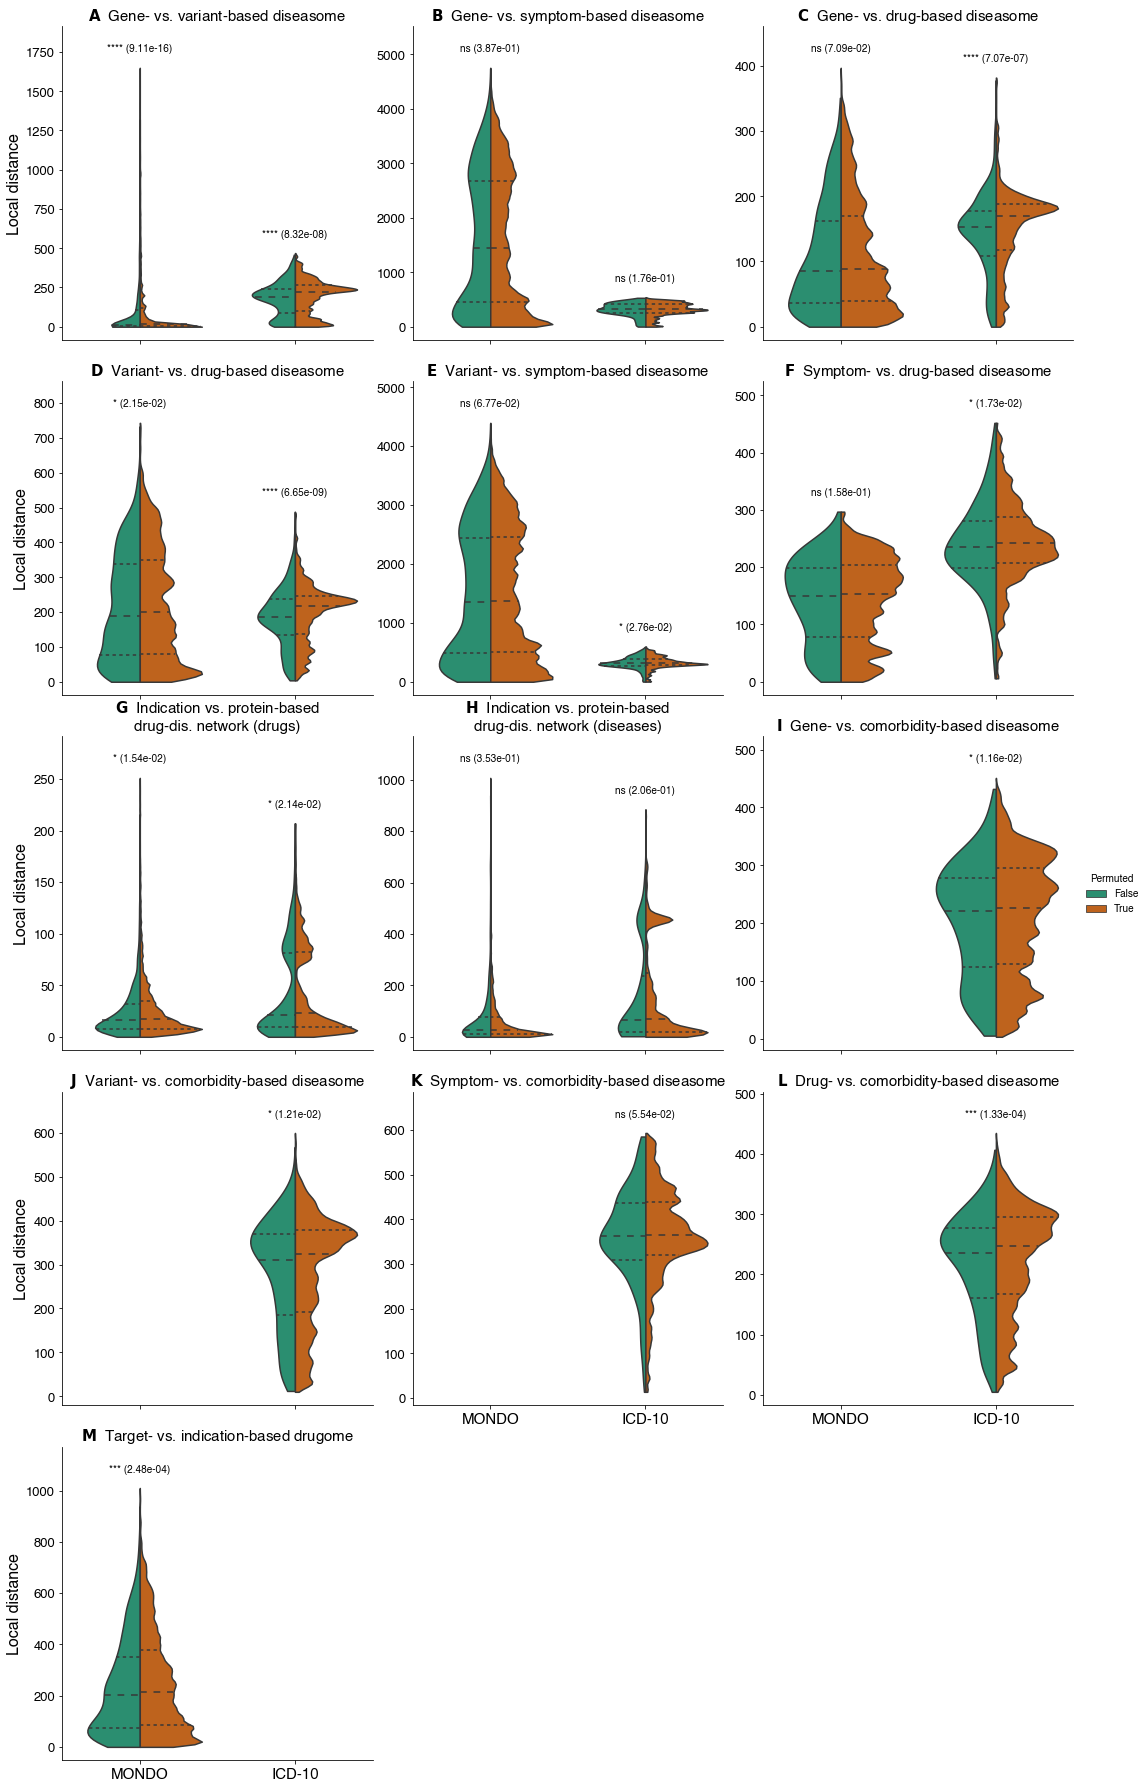

In [10]:
fig = sns.catplot(data=local_distances, sharey=False, palette='Dark2', x='space', col='scenario', hue='Permuted', split=True, kind='violin', y='Local distance', cut=0, inner='quartiles', col_wrap=3)
adjust_titles(fig)
adjust_x_ticks(fig)
for axis in fig.axes.flatten():
    axis.tick_params(axis='y', which='major', labelsize=13)
fig.axes.flatten()[0].set_ylabel('Local distance', fontsize=16)
fig.axes.flatten()[3].set_ylabel('Local distance', fontsize=16)
fig.axes.flatten()[6].set_ylabel('Local distance', fontsize=16)
fig.axes.flatten()[9].set_ylabel('Local distance', fontsize=16)
fig.axes.flatten()[12].set_ylabel('Local distance', fontsize=16)
add_p_values(fig, p_value_strings, maxima)

In [24]:
# fig.savefig('local_distances_all_topology.pdf')
fig.savefig('local_distances_all_topology.png', dpi=600)

---
## Create plots for global distances

In [11]:
global_distances_2 = pd.read_csv('../results/disease_gene_vs_disease_variant/global_distances.csv')
global_distances_2['scenario'] = ['Gene- vs. variant-based diseasome' for _ in range(global_distances_2.shape[0])]
global_distances_3 = pd.read_csv('../results/disease_gene_vs_disease_symptom/global_distances.csv')
global_distances_3['scenario'] = ['Gene- vs. symptom-based diseasome' for _ in range(global_distances_3.shape[0])]
global_distances_4 = pd.read_csv('../results/disease_gene_vs_disease_drug/global_distances.csv')
global_distances_4['scenario'] = ['Gene- vs. drug-based diseasome' for _ in range(global_distances_4.shape[0])]
global_distances_5 = pd.read_csv('../results/disease_drug_vs_disease_variant/global_distances.csv')
global_distances_5['scenario'] = ['Variant- vs. drug-based diseasome' for _ in range(global_distances_5.shape[0])]
global_distances_6 = pd.read_csv('../results/disease_symptom_vs_disease_variant/global_distances.csv')
global_distances_6['scenario'] = ['Variant- vs. symptom-based diseasome' for _ in range(global_distances_6.shape[0])]
global_distances_7 = pd.read_csv('../results/disease_drug_vs_disease_symptom/global_distances.csv')
global_distances_7['scenario'] = ['Symptom- vs. drug-based diseasome' for _ in range(global_distances_7.shape[0])]
global_distances_9 = pd.read_csv('../results/GED_drug_indication_distances_vs_DrPPD/global_distances.csv')
global_distances_9['scenario'] = ['Indication vs. protein-based drug-dis. network' for _ in range(global_distances_9.shape[0])]

global_distances_22 = pd.read_csv('../results/disease_gene_vs_disease_variant_ICD10/global_distances.csv')
global_distances_22['scenario'] = ['Gene- vs. variant-based diseasome' for _ in range(global_distances_22.shape[0])]
global_distances_33 = pd.read_csv('../results/disease_gene_vs_disease_symptom_ICD10/global_distances.csv')
global_distances_33['scenario'] = ['Gene- vs. symptom-based diseasome' for _ in range(global_distances_33.shape[0])]
global_distances_44 = pd.read_csv('../results/disease_gene_vs_disease_drug_ICD10/global_distances.csv')
global_distances_44['scenario'] = ['Gene- vs. drug-based diseasome' for _ in range(global_distances_44.shape[0])]
global_distances_55 = pd.read_csv('../results/disease_drug_vs_disease_variant_ICD10/global_distances.csv')
global_distances_55['scenario'] = ['Variant- vs. drug-based diseasome' for _ in range(global_distances_55.shape[0])]
global_distances_66 = pd.read_csv('../results/disease_symptom_vs_disease_variant_ICD10/global_distances.csv')
global_distances_66['scenario'] = ['Variant- vs. symptom-based diseasome' for _ in range(global_distances_66.shape[0])]
global_distances_77 = pd.read_csv('../results/disease_drug_vs_disease_symptom_ICD10/global_distances.csv')
global_distances_77['scenario'] = ['Symptom- vs. drug-based diseasome' for _ in range(global_distances_77.shape[0])]
global_distances_99 = pd.read_csv('../results/GED_drug_indication_distances_vs_DrPD_ICD10/global_distances.csv')
global_distances_99['scenario'] = ['Indication vs. protein-based drug-dis. network' for _ in range(global_distances_99.shape[0])]

global_distances_1 = pd.read_csv('../results/disease_gene_vs_disease_comorbidity_ICD10/global_distances.csv')
global_distances_1['scenario'] = ['Gene- vs. comorbidity-based diseasome' for _ in range(global_distances_1.shape[0])]
global_distances_10 = pd.read_csv('../results/disease_variant_vs_disease_comorbidity_ICD10/global_distances.csv')
global_distances_10['scenario'] = ['Variant- vs. comorbidity-based diseasome' for _ in range(global_distances_10.shape[0])]
global_distances_11 = pd.read_csv('../results/disease_symptom_vs_disease_comorbidity_ICD10/global_distances.csv')
global_distances_11['scenario'] = ['Symptom- vs. comorbidity-based diseasome' for _ in range(global_distances_11.shape[0])]
global_distances_12 = pd.read_csv('../results/disease_drug_vs_disease_comorbidity_ICD10/global_distances.csv')
global_distances_12['scenario'] = ['Drug- vs. comorbidity-based diseasome' for _ in range(global_distances_12.shape[0])]
global_distances_8 = pd.read_csv('../results/drug_disease_vs_drug_target/global_distances.csv')
global_distances_8['scenario'] = ['Target- vs. indication-based drugome' for _ in range(global_distances_8.shape[0])]

for gd in [global_distances_2, global_distances_22, global_distances_3, global_distances_33, global_distances_4, global_distances_44, 
           global_distances_5, global_distances_55, global_distances_6, global_distances_66, global_distances_7, global_distances_77, 
           global_distances_9, global_distances_99, global_distances_1, global_distances_10, global_distances_11, global_distances_12, global_distances_8]:
    indices_remove = gd[gd['distance_type'] == "normalized_scores"].index
    gd.drop(indices_remove, inplace=True)
    indices_remove = gd[gd['distance_type'] == "normalized_ranks"].index
    gd.drop(indices_remove, inplace=True)

# concatenate both namespaces in one dataframe
gd_concatenated2 = pd.concat([global_distances_2.assign(space='MONDO'), global_distances_22.assign(space='ICD-10')], ignore_index=True)
gd_concatenated3 = pd.concat([global_distances_3.assign(space='MONDO'), global_distances_33.assign(space='ICD-10')], ignore_index=True)
gd_concatenated4 = pd.concat([global_distances_4.assign(space='MONDO'), global_distances_44.assign(space='ICD-10')], ignore_index=True)
gd_concatenated5 = pd.concat([global_distances_5.assign(space='MONDO'), global_distances_55.assign(space='ICD-10')], ignore_index=True)
gd_concatenated6 = pd.concat([global_distances_6.assign(space='MONDO'), global_distances_66.assign(space='ICD-10')], ignore_index=True)
gd_concatenated7 = pd.concat([global_distances_7.assign(space='MONDO'), global_distances_77.assign(space='ICD-10')], ignore_index=True)
gd_concatenated9 = pd.concat([global_distances_9.assign(space='MONDO'), global_distances_99.assign(space='ICD-10')], ignore_index=True)

gd_concatenated1 = global_distances_1.assign(space='ICD-10')
gd_concatenated10 = global_distances_10.assign(space='ICD-10')
gd_concatenated11 = global_distances_11.assign(space='ICD-10')
gd_concatenated12 = global_distances_12.assign(space='ICD-10')
gd_concatenated8 = global_distances_8.assign(space='MONDO')
global_distances = pd.concat([gd_concatenated2, gd_concatenated3, gd_concatenated4, gd_concatenated5, gd_concatenated6, gd_concatenated7, 
                             gd_concatenated9, gd_concatenated1, gd_concatenated10, gd_concatenated11, gd_concatenated12, gd_concatenated8], ignore_index=True)    
global_distances.to_csv('../results/global_distances.csv', index=False)

In [12]:
global_distances.rename(columns={'distance': 'Global distance', 'permuted': 'Permuted'}, inplace=True)

In [13]:
delta_name = 'Difference between original and permuted global distance'
global_distances[delta_name] = [0.0 for _ in range(global_distances.shape[0])]
distance_types = ['topology_only']
scenarios_both = ['Gene- vs. variant-based diseasome', 'Gene- vs. symptom-based diseasome', 'Gene- vs. drug-based diseasome', 'Variant- vs. drug-based diseasome', 'Variant- vs. symptom-based diseasome', 'Symptom- vs. drug-based diseasome', 'Indication vs. protein-based drug-dis. network']
scenarios_only_icd = ['Gene- vs. comorbidity-based diseasome', 'Variant- vs. comorbidity-based diseasome', 'Symptom- vs. comorbidity-based diseasome', 'Drug- vs. comorbidity-based diseasome']
scenarios_only_mondo = ['Target- vs. indication-based drugome']

maxima = []
for distance_type in distance_types:
    dt_filter = global_distances['distance_type'] == distance_type
    mondo_filter = global_distances['space'] == 'MONDO'
    icd_filter = global_distances['space'] == 'ICD-10'
    for scenario in scenarios_both:
        sc_filter = global_distances['scenario'] == scenario
        true_distance_mondo = global_distances['Global distance'][~global_distances['Permuted'] & dt_filter & sc_filter & mondo_filter].to_numpy()[0]
        true_distance_icd = global_distances['Global distance'][~global_distances['Permuted'] & dt_filter & sc_filter & icd_filter].to_numpy()[0]
        differences_mondo = global_distances['Global distance'][dt_filter & sc_filter & mondo_filter].to_numpy() - true_distance_mondo
        differences_icd = global_distances['Global distance'][dt_filter & sc_filter & icd_filter].to_numpy() - true_distance_icd
        global_distances.loc[dt_filter & sc_filter & mondo_filter, delta_name] = differences_mondo
        global_distances.loc[dt_filter & sc_filter & icd_filter, delta_name] = differences_icd
        maxima.append([differences_mondo.max(), differences_icd.max()])
    for scenario in scenarios_only_icd:
        sc_filter = global_distances['scenario'] == scenario
        true_distance_icd = global_distances['Global distance'][~global_distances['Permuted'] & dt_filter & sc_filter & icd_filter].to_numpy()[0]
        differences_icd = global_distances['Global distance'][dt_filter & sc_filter & icd_filter].to_numpy() - true_distance_icd
        global_distances.loc[dt_filter & sc_filter & icd_filter, delta_name] = differences_icd
        maxima.append([0.0, differences_icd.max()])
    for scenario in scenarios_only_mondo:
        sc_filter = global_distances['scenario'] == scenario
        true_distance_mondo = global_distances['Global distance'][~global_distances['Permuted'] & dt_filter & sc_filter & mondo_filter].to_numpy()[0]
        differences_mondo = global_distances['Global distance'][dt_filter & sc_filter & mondo_filter].to_numpy() - true_distance_mondo
        global_distances.loc[dt_filter & sc_filter & mondo_filter, delta_name] = differences_mondo
        maxima.append([differences_mondo.max()])
        
print(maxima)
print(len(maxima))

[[31826.0, 6034.0], [11618.0, 1472.0], [2604.0, 2406.0], [6784.0, 4742.0], [52574.0, 2096.0], [836.0, 1536.0], [1968.0, 2198.0], [0.0, 2910.0], [0.0, 3462.0], [0.0, 2264.0], [0.0, 3496.0], [15684.0]]
12


In [14]:
# P-values are from global_empirical_p_values.csv files in the respective results directories.
p_values_2 = pd.read_csv('../results/disease_gene_vs_disease_variant/global_empirical_p_values.csv')
p_values_3 = pd.read_csv('../results/disease_gene_vs_disease_symptom/global_empirical_p_values.csv')
p_values_4 = pd.read_csv('../results/disease_gene_vs_disease_drug/global_empirical_p_values.csv')
p_values_5 = pd.read_csv('../results/disease_drug_vs_disease_variant/global_empirical_p_values.csv')
p_values_6 = pd.read_csv('../results/disease_symptom_vs_disease_variant/global_empirical_p_values.csv')
p_values_7 = pd.read_csv('../results/disease_drug_vs_disease_symptom/global_empirical_p_values.csv')
p_values_9 = pd.read_csv('../results/GED_drug_indication_distances_vs_DrPPD/global_empirical_p_values.csv')

p_values_22 = pd.read_csv('../results/disease_gene_vs_disease_variant_ICD10/global_empirical_p_values.csv')
p_values_33 = pd.read_csv('../results/disease_gene_vs_disease_symptom_ICD10/global_empirical_p_values.csv')
p_values_44 = pd.read_csv('../results/disease_gene_vs_disease_drug_ICD10/global_empirical_p_values.csv')
p_values_55 = pd.read_csv('../results/disease_drug_vs_disease_variant_ICD10/global_empirical_p_values.csv')
p_values_66 = pd.read_csv('../results/disease_symptom_vs_disease_variant_ICD10/global_empirical_p_values.csv')
p_values_77 = pd.read_csv('../results/disease_drug_vs_disease_symptom_ICD10/global_empirical_p_values.csv')
p_values_99 = pd.read_csv('../results/GED_drug_indication_distances_vs_DrPD_ICD10/global_empirical_p_values.csv')

p_values_1 = pd.read_csv('../results/disease_gene_vs_disease_comorbidity_ICD10/global_empirical_p_values.csv')
p_values_10 = pd.read_csv('../results/disease_variant_vs_disease_comorbidity_ICD10/global_empirical_p_values.csv')
p_values_11 = pd.read_csv('../results/disease_symptom_vs_disease_comorbidity_ICD10/global_empirical_p_values.csv')
p_values_12 = pd.read_csv('../results/disease_drug_vs_disease_comorbidity_ICD10/global_empirical_p_values.csv')
p_values_8 = pd.read_csv('../results/drug_disease_vs_drug_target/global_empirical_p_values.csv')

for pvd in [p_values_2, p_values_22, p_values_3, p_values_33, p_values_4, p_values_44, p_values_5, p_values_55, p_values_6, p_values_66, p_values_7, 
            p_values_77, p_values_1, p_values_10, p_values_11, p_values_12, p_values_8]:
    indices_remove = pvd[pvd['distance_type'] == "normalized_scores"].index
    pvd.drop(indices_remove, inplace=True)
    indices_remove = pvd[pvd['distance_type'] == "normalized_ranks"].index
    pvd.drop(indices_remove, inplace=True)
    
pval_concatenated2 = pd.concat([p_values_2.assign(space='MONDO'), p_values_22.assign(space='ICD-10')], ignore_index=True)
pval_concatenated2.set_index('space', inplace=True)
pval_concatenated3 = pd.concat([p_values_3.assign(space='MONDO'), p_values_33.assign(space='ICD-10')], ignore_index=True)
pval_concatenated3.set_index('space', inplace=True)
pval_concatenated4 = pd.concat([p_values_4.assign(space='MONDO'), p_values_44.assign(space='ICD-10')], ignore_index=True)
pval_concatenated4.set_index('space', inplace=True)
pval_concatenated5 = pd.concat([p_values_5.assign(space='MONDO'), p_values_55.assign(space='ICD-10')], ignore_index=True)
pval_concatenated5.set_index('space', inplace=True)
pval_concatenated6 = pd.concat([p_values_6.assign(space='MONDO'), p_values_66.assign(space='ICD-10')], ignore_index=True)
pval_concatenated6.set_index('space', inplace=True)
pval_concatenated7 = pd.concat([p_values_7.assign(space='MONDO'), p_values_77.assign(space='ICD-10')], ignore_index=True)
pval_concatenated7.set_index('space', inplace=True)
pval_concatenated9 = pd.concat([p_values_9.assign(space='MONDO'), p_values_99.assign(space='ICD-10')], ignore_index=True)
pval_concatenated9.set_index('space', inplace=True)
pval_concatenated1 = p_values_1.assign(space='ICD-10')
pval_concatenated1.set_index('space', inplace=True)
pval_concatenated10 = p_values_10.assign(space='ICD-10')
pval_concatenated10.set_index('space', inplace=True)
pval_concatenated11 = p_values_11.assign(space='ICD-10')
pval_concatenated11.set_index('space', inplace=True)
pval_concatenated12 = p_values_12.assign(space='ICD-10')
pval_concatenated12.set_index('space', inplace=True)
pval_concatenated8 = p_values_8.assign(space='MONDO')
pval_concatenated8.set_index('space', inplace=True)

p_val_list = [pval_concatenated2, pval_concatenated3, pval_concatenated4, pval_concatenated5, pval_concatenated6, pval_concatenated7, pval_concatenated9]
p_values = [[pv.loc['MONDO', 'p_value'], pv.loc['ICD-10', 'p_value']] for pv in p_val_list]
p_values.append([pval_concatenated1.loc['ICD-10', 'p_value']])
p_values.append([pval_concatenated10.loc['ICD-10', 'p_value']])
p_values.append([pval_concatenated11.loc['ICD-10', 'p_value']])
p_values.append([pval_concatenated12.loc['ICD-10', 'p_value']])
p_values.append([pval_concatenated8.loc['MONDO', 'p_value']])

p_value_strings = [[f'{p_value_to_level(p_value)} ({"{:.2e}".format(p_value)})' for p_value in vals] for vals in p_values]
for i in range(7,11):
    p_value_strings[i] = ['', p_value_strings[i][0]]
p_value_strings[11] = [p_value_strings[11][0]]
print(p_value_strings)

[['*** (9.99e-04)', '*** (9.99e-04)'], ['*** (9.99e-04)', '*** (9.99e-04)'], ['*** (9.99e-04)', '*** (9.99e-04)'], ['*** (9.99e-04)', '*** (9.99e-04)'], ['*** (9.99e-04)', '*** (9.99e-04)'], ['*** (9.99e-04)', '*** (9.99e-04)'], ['*** (9.99e-04)', '*** (9.99e-04)'], ['', '*** (9.99e-04)'], ['', '*** (9.99e-04)'], ['', '*** (9.99e-04)'], ['', '*** (9.99e-04)'], ['*** (9.99e-04)']]
12


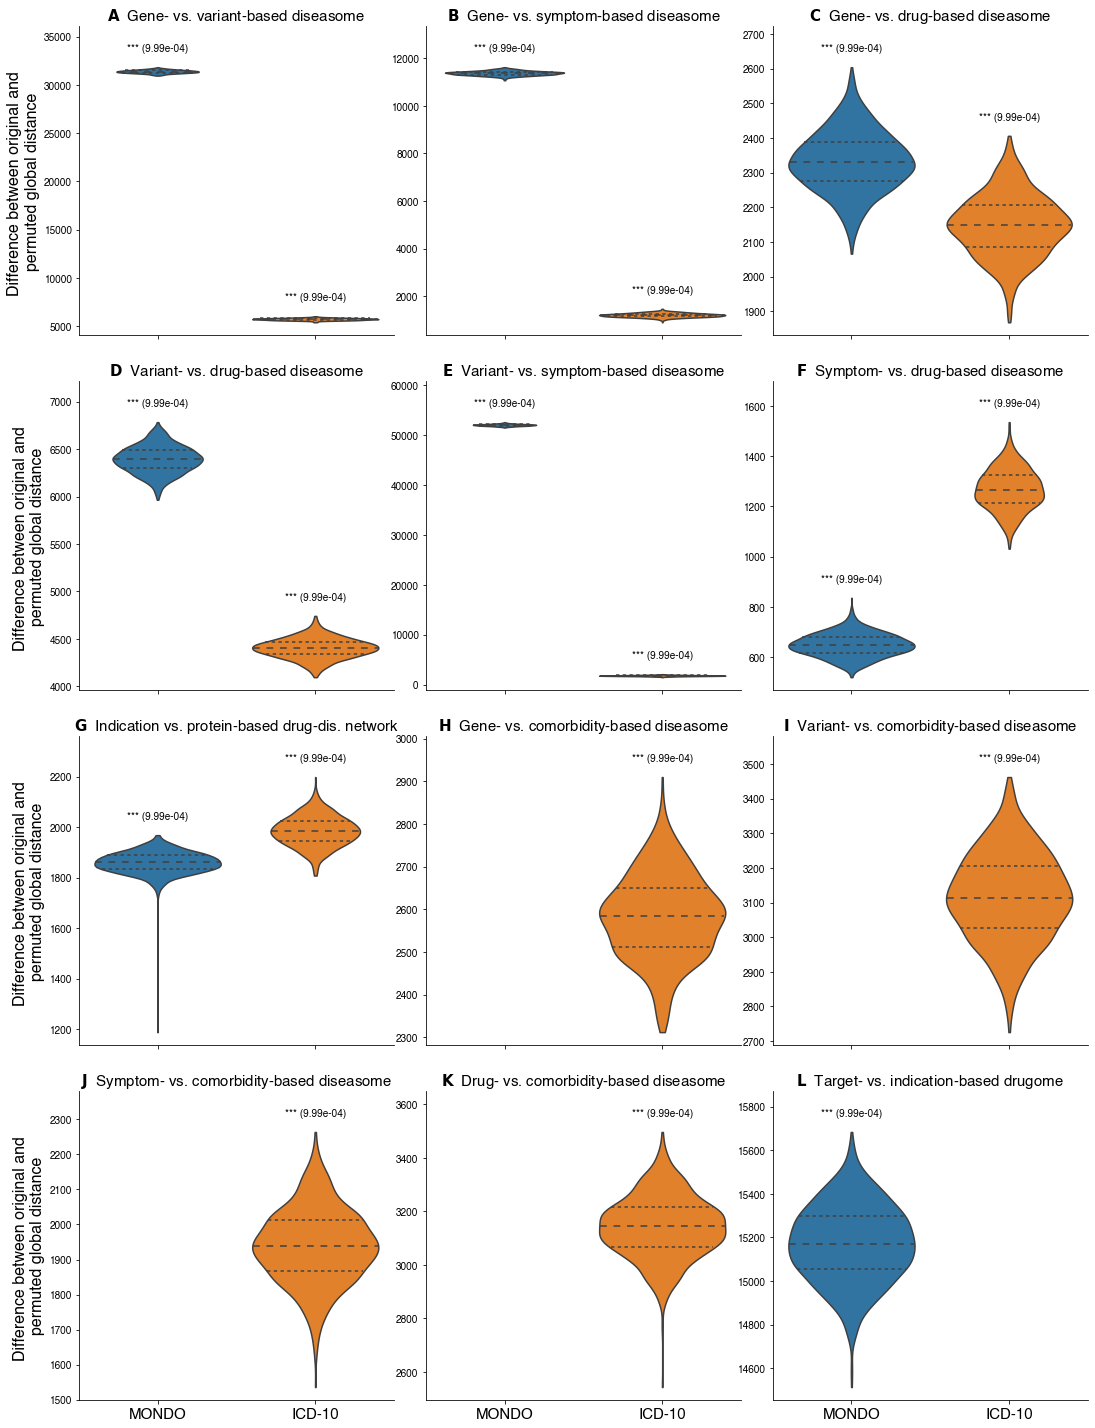

In [15]:
fig = sns.catplot(data=global_distances[global_distances['Permuted']], sharey=False, inner='quartiles', kind='violin', cut=0, palette='tab10', x='space', col='scenario', y=delta_name, col_wrap=3)
plt.subplots_adjust(wspace = 0.1)
plt.subplots_adjust(hspace = 0.15)
adjust_titles(fig)
adjust_x_ticks(fig)
fig.axes.flatten()[0].set_ylabel('Difference between original and \npermuted global distance', fontsize=16)
fig.axes.flatten()[3].set_ylabel('Difference between original and \npermuted global distance', fontsize=16)
fig.axes.flatten()[6].set_ylabel('Difference between original and \npermuted global distance', fontsize=16)
fig.axes.flatten()[9].set_ylabel('Difference between original and \npermuted global distance', fontsize=16)

add_p_values(fig, p_value_strings, maxima)

In [33]:
# fig.savefig('difference_global_distances_all_topology.pdf')
fig.savefig('difference_global_distances_all_topology.png', dpi=600)

---
## Create plots for local empirical p-values

In [16]:
p_values_2 = pd.read_csv('../results/disease_gene_vs_disease_variant/local_empirical_p_values.csv')
p_values_2['scenario'] = ['Gene- vs. variant-based diseasome' for _ in range(p_values_2.shape[0])]
p_values_3 = pd.read_csv('../results/disease_gene_vs_disease_symptom/local_empirical_p_values.csv')
p_values_3['scenario'] = ['Gene- vs. symptom-based diseasome' for _ in range(p_values_3.shape[0])]
p_values_4 = pd.read_csv('../results/disease_gene_vs_disease_drug/local_empirical_p_values.csv')
p_values_4['scenario'] = ['Gene- vs. drug-based diseasome' for _ in range(p_values_4.shape[0])]
p_values_5 = pd.read_csv('../results/disease_drug_vs_disease_variant/local_empirical_p_values.csv')
p_values_5['scenario'] = ['Variant- vs. drug-based diseasome' for _ in range(p_values_5.shape[0])]
p_values_6 = pd.read_csv('../results/disease_symptom_vs_disease_variant/local_empirical_p_values.csv')
p_values_6['scenario'] = ['Variant- vs. symptom-based diseasome' for _ in range(p_values_6.shape[0])]
p_values_7 = pd.read_csv('../results/disease_drug_vs_disease_symptom/local_empirical_p_values.csv')
p_values_7['scenario'] = ['Symptom- vs. drug-based diseasome' for _ in range(p_values_7.shape[0])]
p_values_9 = pd.read_csv('../results/GED_drug_indication_distances_vs_DrPPD/local_empirical_p_values.csv')
p_values_9Dr = p_values_9[p_values_9['node'].str.contains('drugbank')] 
p_values_9Dr['scenario'] = ['Indication vs. protein-based drug-dis. network (drugs)' for _ in range(p_values_9Dr.shape[0])]
p_values_9Dis = p_values_9[~p_values_9['node'].str.contains('drugbank')]
p_values_9Dis['scenario'] = ['Indication vs. protein-based drug-dis. network (diseases)' for _ in range(p_values_9Dis.shape[0])]

p_values_22 = pd.read_csv('../results/disease_gene_vs_disease_variant_ICD10/local_empirical_p_values.csv')
p_values_22['scenario'] = ['Gene- vs. variant-based diseasome' for _ in range(p_values_22.shape[0])]
p_values_33 = pd.read_csv('../results/disease_gene_vs_disease_symptom_ICD10/local_empirical_p_values.csv')
p_values_33['scenario'] = ['Gene- vs. symptom-based diseasome' for _ in range(p_values_33.shape[0])]
p_values_44 = pd.read_csv('../results/disease_gene_vs_disease_drug_ICD10/local_empirical_p_values.csv')
p_values_44['scenario'] = ['Gene- vs. drug-based diseasome' for _ in range(p_values_44.shape[0])]
p_values_55 = pd.read_csv('../results/disease_drug_vs_disease_variant_ICD10/local_empirical_p_values.csv')
p_values_55['scenario'] = ['Variant- vs. drug-based diseasome' for _ in range(p_values_55.shape[0])]
p_values_66 = pd.read_csv('../results/disease_symptom_vs_disease_variant_ICD10/local_empirical_p_values.csv')
p_values_66['scenario'] = ['Variant- vs. symptom-based diseasome' for _ in range(p_values_66.shape[0])]
p_values_77 = pd.read_csv('../results/disease_drug_vs_disease_symptom_ICD10/local_empirical_p_values.csv')
p_values_77['scenario'] = ['Symptom- vs. drug-based diseasome' for _ in range(p_values_77.shape[0])]
p_values_99 = pd.read_csv('../results/GED_drug_indication_distances_vs_DrPD_ICD10/local_empirical_p_values.csv')
p_values_99Dr = p_values_99[p_values_99['node'].str.contains('drugbank')]    
p_values_99Dr['scenario'] = ['Indication vs. protein-based drug-dis. network (drugs)' for _ in range(p_values_99Dr.shape[0])]
p_values_99Dis = p_values_99[~p_values_99['node'].str.contains('drugbank')]
p_values_99Dis['scenario'] = ['Indication vs. protein-based drug-dis. network (diseases)' for _ in range(p_values_99Dis.shape[0])]

p_values_1 = pd.read_csv('../results/disease_gene_vs_disease_comorbidity_ICD10/local_empirical_p_values.csv')
p_values_1['scenario'] = ['Gene- vs. comorbidity-based diseasome' for _ in range(p_values_1.shape[0])]
p_values_10 = pd.read_csv('../results/disease_variant_vs_disease_comorbidity_ICD10/local_empirical_p_values.csv')
p_values_10['scenario'] = ['Variant- vs. comorbidity-based diseasome' for _ in range(p_values_10.shape[0])]
p_values_11 = pd.read_csv('../results/disease_symptom_vs_disease_comorbidity_ICD10/local_empirical_p_values.csv')
p_values_11['scenario'] = ['Symptom- vs. comorbidity-based diseasome' for _ in range(p_values_11.shape[0])]
p_values_12 = pd.read_csv('../results/disease_drug_vs_disease_comorbidity_ICD10/local_empirical_p_values.csv')
p_values_12['scenario'] = ['Drug- vs. comorbidity-based diseasome' for _ in range(p_values_12.shape[0])]
p_values_8 = pd.read_csv('../results/drug_disease_vs_drug_target/local_empirical_p_values.csv')
p_values_8['scenario'] = ['Target- vs. indication-based drugome' for _ in range(p_values_8.shape[0])]

for pv in [p_values_2, p_values_22, p_values_3, p_values_33, p_values_4, p_values_44, p_values_5, p_values_55, p_values_6, p_values_66, 
          p_values_7, p_values_77, p_values_8, p_values_1, p_values_10, p_values_11, p_values_12]:
    indices_remove = pv[pv['distance_type'] == "normalized_scores"].index
    pv.drop(indices_remove, inplace=True)
    indices_remove = pv[pv['distance_type'] == "normalized_ranks"].index
    pv.drop(indices_remove, inplace=True)
    
pv_concatenated2 = pd.concat([p_values_2.assign(space='MONDO'), p_values_22.assign(space='ICD-10')], ignore_index=True)
pv_concatenated3 = pd.concat([p_values_3.assign(space='MONDO'), p_values_33.assign(space='ICD-10')], ignore_index=True)
pv_concatenated4 = pd.concat([p_values_4.assign(space='MONDO'), p_values_44.assign(space='ICD-10')], ignore_index=True)
pv_concatenated5 = pd.concat([p_values_5.assign(space='MONDO'), p_values_55.assign(space='ICD-10')], ignore_index=True)
pv_concatenated6 = pd.concat([p_values_6.assign(space='MONDO'), p_values_66.assign(space='ICD-10')], ignore_index=True)
pv_concatenated7 = pd.concat([p_values_7.assign(space='MONDO'), p_values_77.assign(space='ICD-10')], ignore_index=True)
pv_concatenated9Dr = pd.concat([p_values_9Dr.assign(space='MONDO'), p_values_99Dr.assign(space='ICD-10')], ignore_index=True)
pv_concatenated9Dis = pd.concat([p_values_9Dis.assign(space='MONDO'), p_values_99Dis.assign(space='ICD-10')], ignore_index=True)
pv_concatenated1 = p_values_1.assign(space='ICD-10')
pv_concatenated10 = p_values_10.assign(space='ICD-10')
pv_concatenated11 = p_values_11.assign(space='ICD-10')
pv_concatenated12 = p_values_12.assign(space='ICD-10')
pv_concatenated8 = p_values_8.assign(space='MONDO')
p_values = pd.concat([pv_concatenated2, pv_concatenated3, pv_concatenated4, pv_concatenated5, pv_concatenated6, pv_concatenated7, 
                      pv_concatenated9Dr, pv_concatenated9Dis, pv_concatenated1, pv_concatenated10, pv_concatenated11, pv_concatenated12, pv_concatenated8], ignore_index=True)
p_values.rename(columns={'p_value': 'Local empirical p-value', 'distance_type': 'Distance type'}, inplace=True)
p_values.rename(columns={'space': 'Namespace'}, inplace=True)

/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_21520/1959069649.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_values_9Dr['scenario'] = ['Indication vs. protein-based drug-dis. network (drugs)' for _ in range(p_values_9Dr.shape[0])]
/var/folders/r1/j3cs02p96yn8vh79dpfd3_m40000gn/T/ipykernel_21520/1959069649.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_values_9Dis['scenario'] = ['Indication vs. protein-based drug-dis. network (diseases)' for _ in range(p_values_9Dis.shape[0])]
/

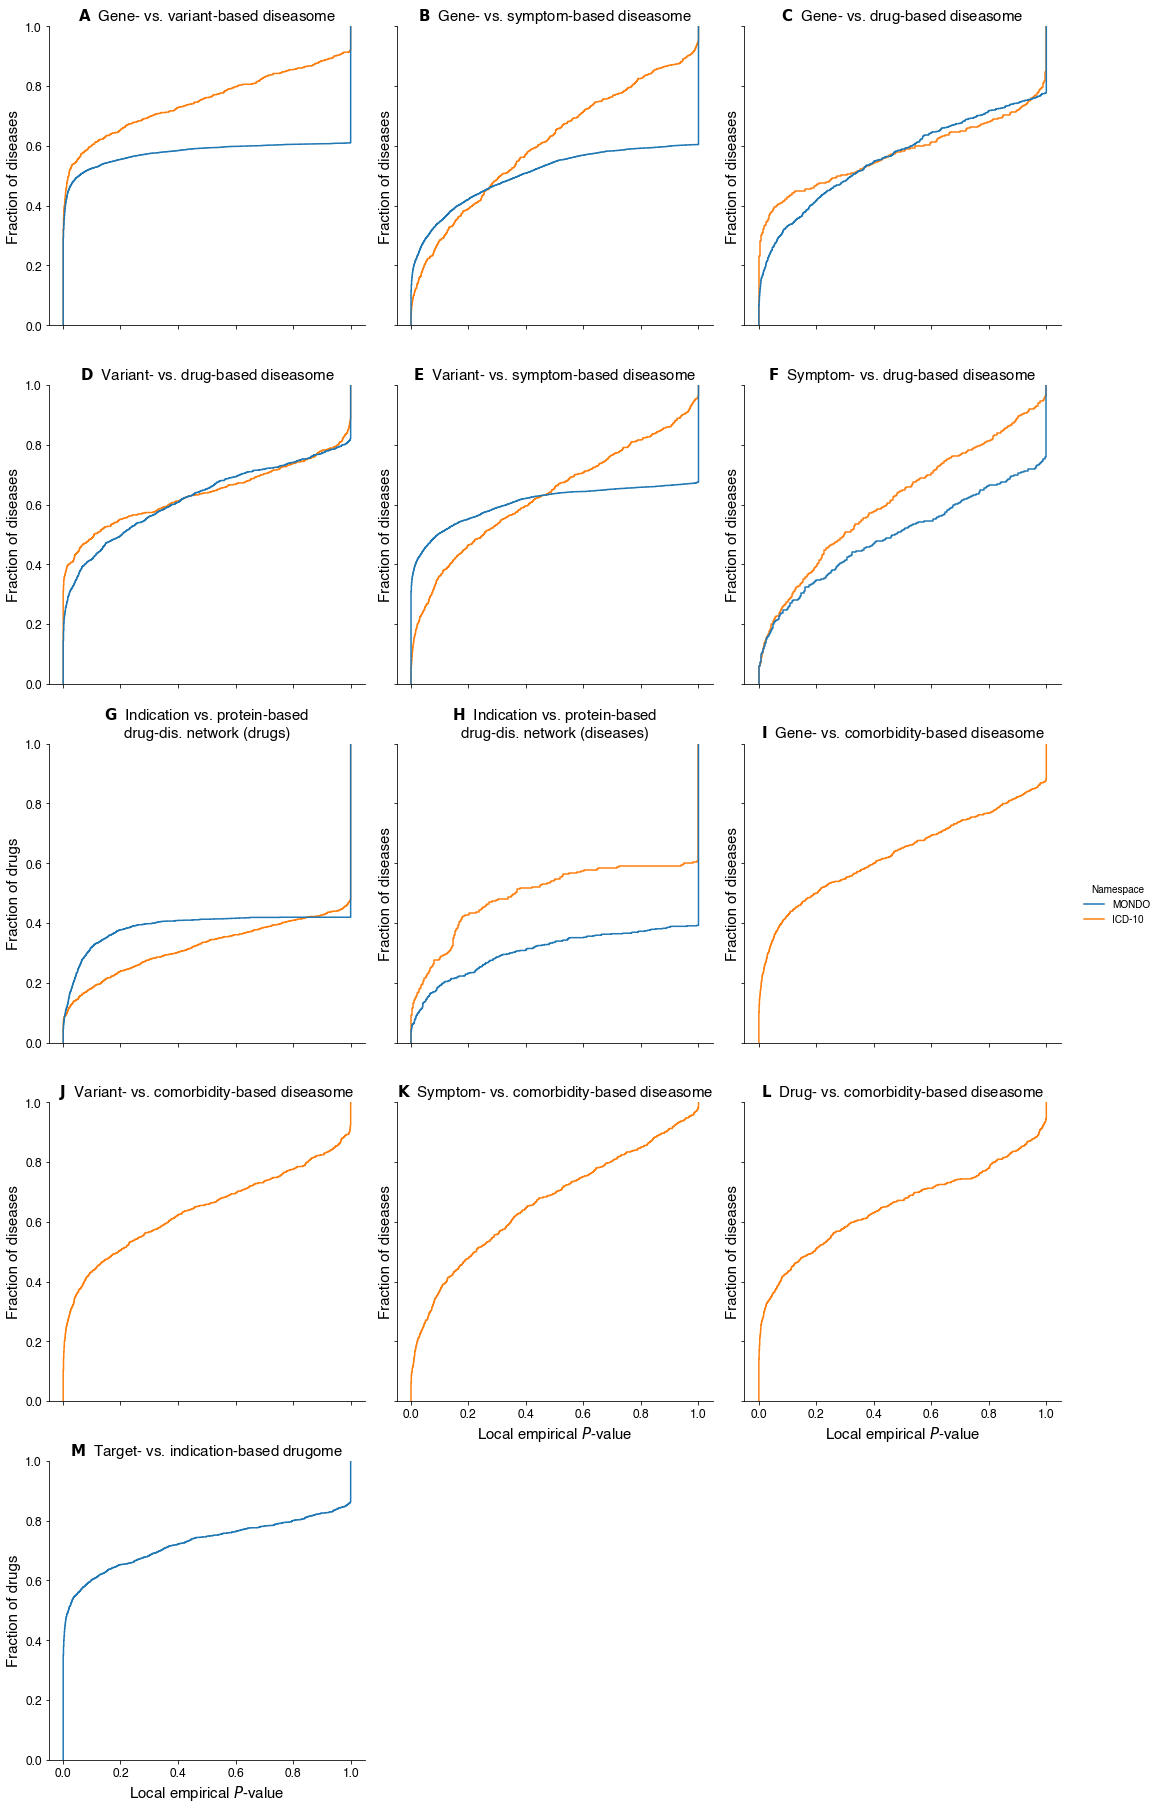

In [17]:
fig = sns.displot(data=p_values, kind='ecdf', palette='tab10',hue_order=['MONDO', 'ICD-10'], hue='Namespace', col='scenario', x='Local empirical p-value', col_wrap=3)
fig.set_xlabels('Local empirical ' + r'$P$' + '-value', fontsize = 15)
plt.subplots_adjust(wspace = 0.1)
plt.subplots_adjust(hspace = 0.2)
for counter, axis in enumerate(fig.axes.flat):
    axis.tick_params(axis='both', which='major', labelsize=12)
    axis.set_ylabel('Fraction of diseases', fontsize=15)
    if counter < 6:
        axis.set_ylabel('Fraction of diseases', fontsize=15, visible=True)
    elif counter == 6:
        axis.set_ylabel('Fraction of drugs', fontsize=15, visible=True)
    elif 6 < counter < 12:
        axis.set_ylabel('Fraction of diseases', fontsize=15, visible=True)
    elif counter == 12:
        axis.set_ylabel('Fraction of drugs', fontsize=15, visible=True)
adjust_titles(fig)

In [38]:
# fig.savefig('local_empirical_p_values_all_topology.pdf')
fig.savefig('local_empirical_p_values_all_topology.png', dpi=600)

---
## Create plots for distances vs. reference edges

In [18]:
distances_1 = pd.read_csv('../results/disease_distances_vs_comorbidities_noPropag/shortest_path_distances.csv')
distances_1['scenario'] = ['Disease distances vs. comorbidities' for _ in range(distances_1.shape[0])]
distances_2 = pd.read_csv('../results/disease_distances_vs_shared_variants/shortest_path_distances.csv')
distances_2['scenario'] = ['Disease distances vs. shared variants' for _ in range(distances_2.shape[0])]
distances_3 = pd.read_csv('../results/disease_distances_vs_shared_symptoms/shortest_path_distances.csv')
distances_3['scenario'] = ['Disease distances vs. shared symptoms' for _ in range(distances_3.shape[0])]
distances_4 = pd.read_csv('../results/disease_distances_vs_shared_drugs/shortest_path_distances.csv')
distances_4['scenario'] = ['Disease distances vs. shared drugs' for _ in range(distances_4.shape[0])]
distances_5 = pd.read_csv('../results/drug_indication_distances_vs_DrPPD/shortest_path_distances.csv')
distances_5['scenario'] = ['Drug-indication distances vs. DrPPD' for _ in range(distances_5.shape[0])]
distances_6 = pd.read_csv('../results/drug_distances_vs_shared_indications/shortest_path_distances.csv')
distances_6['scenario'] = ['Drug distances vs. shared indications' for _ in range(distances_6.shape[0])]
distances = pd.concat([distances_1, distances_2, distances_3, distances_4, distances_5, distances_6], ignore_index=True)

In [19]:
fractions = {'scenario': [], 'reference_edge': [], 'distance': [], 'fraction': []}
scenarios = list(set(distances['scenario']))

ref_filter = distances['reference_edge']
for scenario in scenarios:
    sc_filter = (distances['scenario'] == scenario)
    num_ref = distances[sc_filter & ref_filter].shape[0]
    num_non_ref = distances[sc_filter & ~ref_filter].shape[0]
    distance_values = set(distances[sc_filter]['distance'])
    for distance_value in distance_values:
        dist_filter = (distances['distance'] == distance_value)
        num_ref_with_dist = distances[sc_filter & ref_filter & dist_filter].shape[0]
        num_non_ref_with_dist = distances[sc_filter & ~ref_filter & dist_filter].shape[0]
        fractions['scenario'].append(scenario)
        fractions['scenario'].append(scenario)
        fractions['reference_edge'].append(True)
        fractions['reference_edge'].append(False)
        fractions['distance'].append(distance_value)
        fractions['distance'].append(distance_value)
        fractions['fraction'].append(num_ref_with_dist / num_ref)
        fractions['fraction'].append(num_non_ref_with_dist / num_non_ref)
fractions = pd.DataFrame(data=fractions)

In [20]:
frac_name = 'Fraction of disease pairs'
dist_name = 'Distance between diseases in disease-gene network'
ref_name = 'Edge in reference network'
fractions.rename(columns={'fraction': frac_name, 'distance': dist_name, 'reference_edge': ref_name}, inplace=True)

In [21]:
def add_axis_texts(fig, texts):
    for axis_index, axis in enumerate(fig.axes.flatten()):
        bottom, top = axis.get_ylim()
        left, right = axis.get_xlim()
        axis.text(right - (right - left) * .05, top - (top - bottom) * .05, texts[axis_index], ha='right', va='top')

In [22]:
# P-values are from shortest_path_distance_analysis.json files in the respective results directories.
p_values = []
f = open('../results/disease_distances_vs_comorbidities_noPropag/shortest_path_distance_analysis.json', 'r')
data = json.load(f)
p_values.append(data['mwu_test']['p_value'])
f = open('../results/disease_distances_vs_shared_variants/shortest_path_distance_analysis.json', 'r')
data = json.load(f)
p_values.append(data['mwu_test']['p_value'])
f = open('../results/disease_distances_vs_shared_symptoms/shortest_path_distance_analysis.json', 'r')
data = json.load(f)
p_values.append(data['mwu_test']['p_value'])
f = open('../results/disease_distances_vs_shared_drugs/shortest_path_distance_analysis.json', 'r')
data = json.load(f)
p_values.append(data['mwu_test']['p_value'])
f = open('../results/drug_indication_distances_vs_DrPPD/shortest_path_distance_analysis.json', 'r')
data = json.load(f)
p_values.append(data['mwu_test']['p_value'])
f = open('../results/drug_distances_vs_shared_indications/shortest_path_distance_analysis.json', 'r')
data = json.load(f)
p_values.append(data['mwu_test']['p_value'])
p_equals = r'$P\simeq$' 
p_value_strings = [f'{p_value_to_level(p_value)} ({"{:.2e}".format(p_value)})' for p_value in p_values]
print(p_value_strings)

['**** (1.59e-14)', '**** (0.00e+00)', '**** (0.00e+00)', '**** (0.00e+00)', '**** (0.00e+00)', '**** (0.00e+00)']


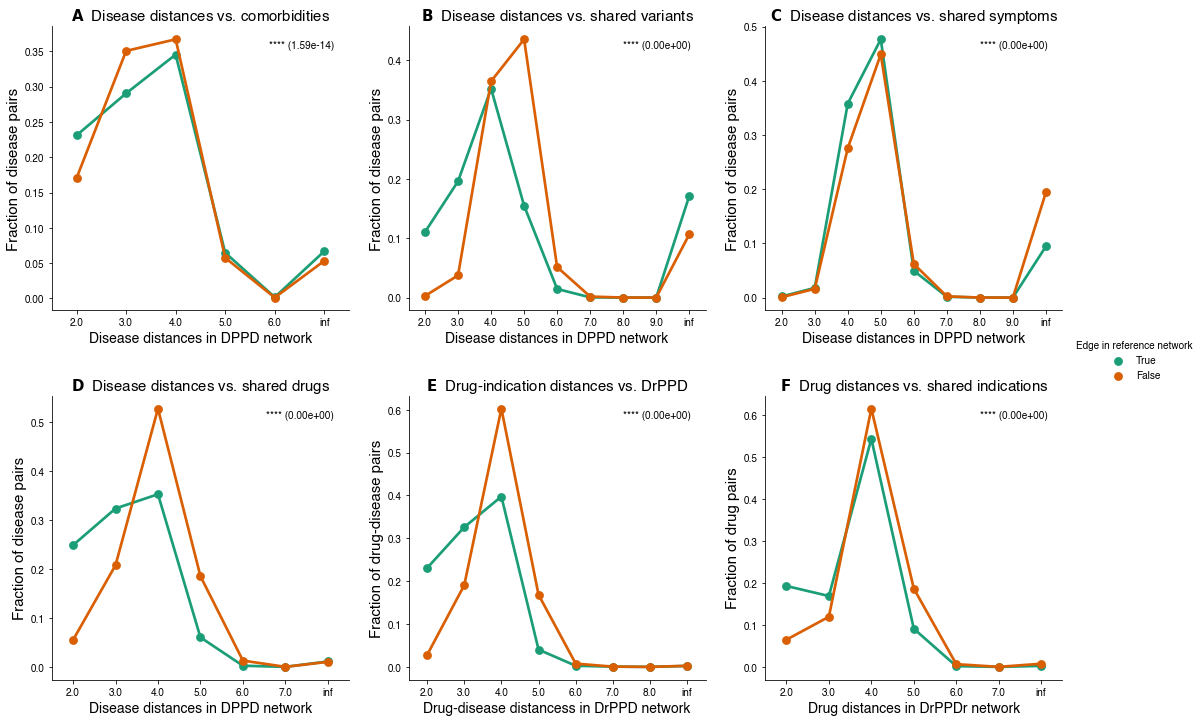

In [24]:
fig = sns.catplot(data=fractions, x=dist_name, col='scenario', hue_order=[True, False], palette='Dark2', 
                  sharex=False, sharey=False, hue=ref_name, y=frac_name, kind='point', 
                 col_order=['Disease distances vs. comorbidities', 'Disease distances vs. shared variants',
                           'Disease distances vs. shared symptoms', 'Disease distances vs. shared drugs', 
                            'Drug-indication distances vs. DrPPD', 'Drug distances vs. shared indications'], 
                  col_wrap=3, hspace = 2.0)
plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.2)
adjust_titles(fig)
for counter, axis in enumerate(fig.axes.flatten()):
    if counter < 4:
        axis.set_xlabel('Disease distances in DPPD network', fontsize=14)
        axis.set_ylabel('Fraction of disease pairs', fontsize=15)
    elif counter == 4:
        axis.set_xlabel('Drug-disease distancess in DrPPD network', fontsize=14)
        axis.set_ylabel('Fraction of drug-disease pairs', fontsize=15)
    elif counter == 5:
        axis.set_xlabel('Drug distances in DrPPDr network', fontsize=14)
        axis.set_ylabel('Fraction of drug pairs', fontsize=15)
    
add_axis_texts(fig, p_value_strings)


In [28]:
# fig.savefig('distances_vs_reference_edges_all.pdf')
fig.savefig('distances_vs_reference_edges_all.png', dpi=600)